# 1.Importation du fichier csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import numpy as np
# Charger les données à partir du fichier CSV
df = pd.read_csv("Data/banking.csv")

# Afficher les premières lignes pour vérification
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# 2.Générer Histogrammes et boites à moustaches.Calculer le taux de valeurs manquantes pour chaque variable et détecter la présence de valeurs aberrantes le cas échéant.

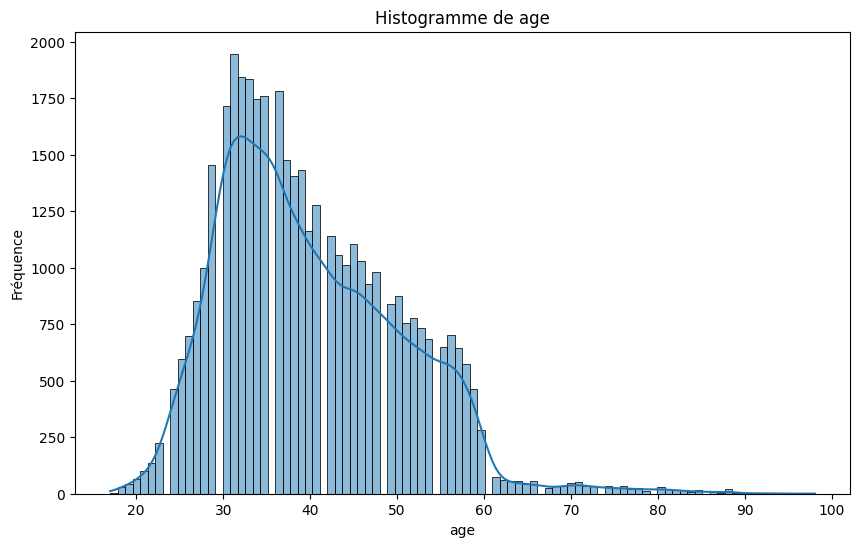

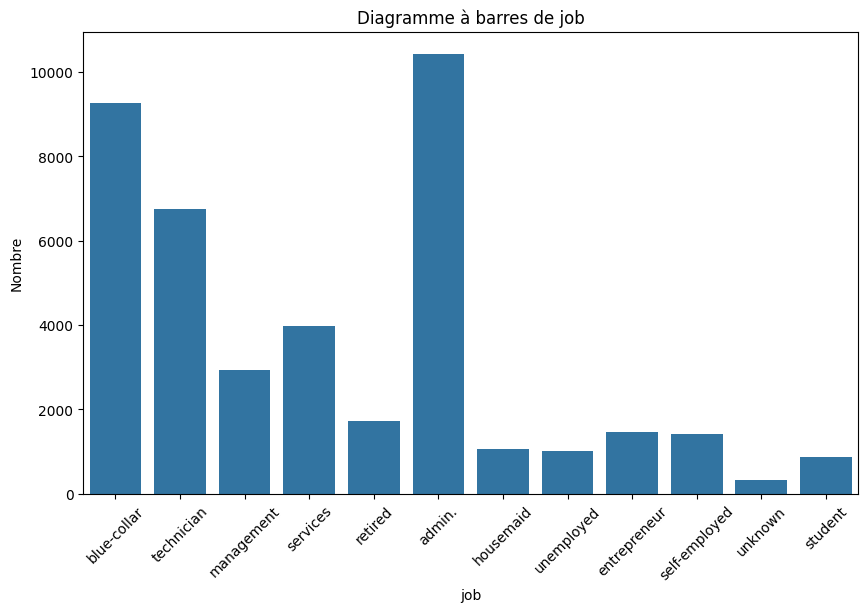

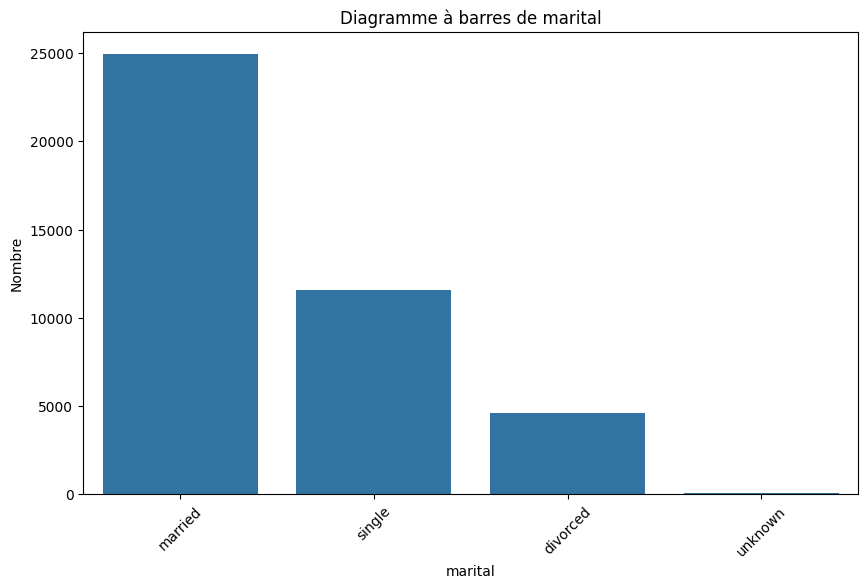

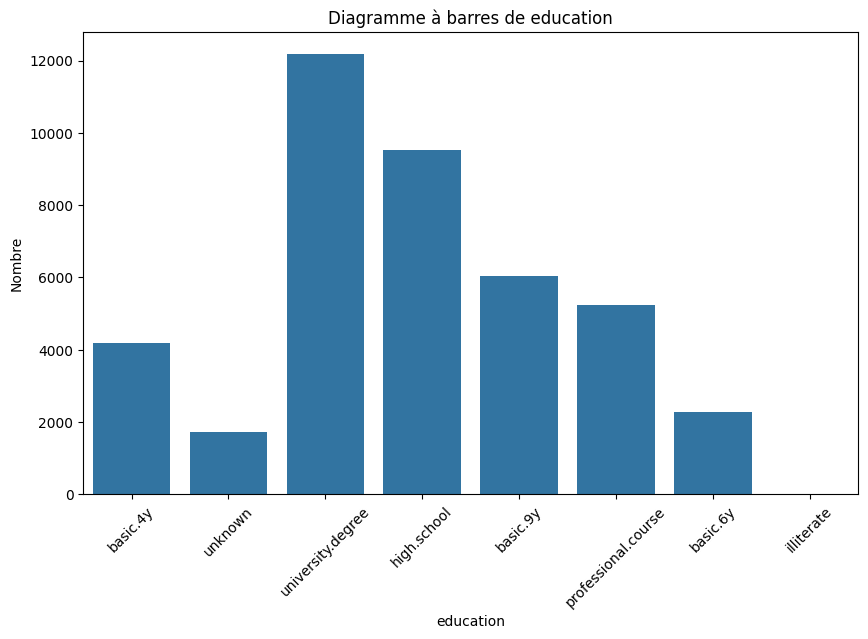

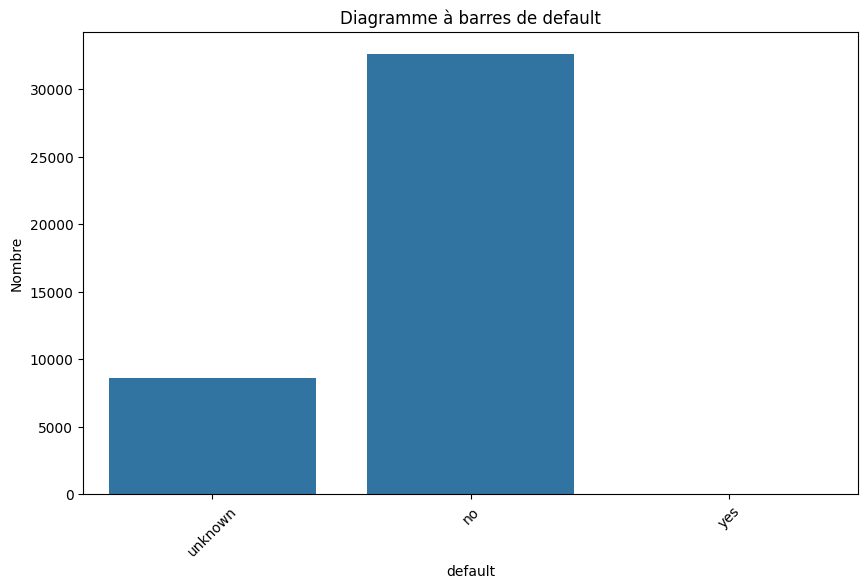

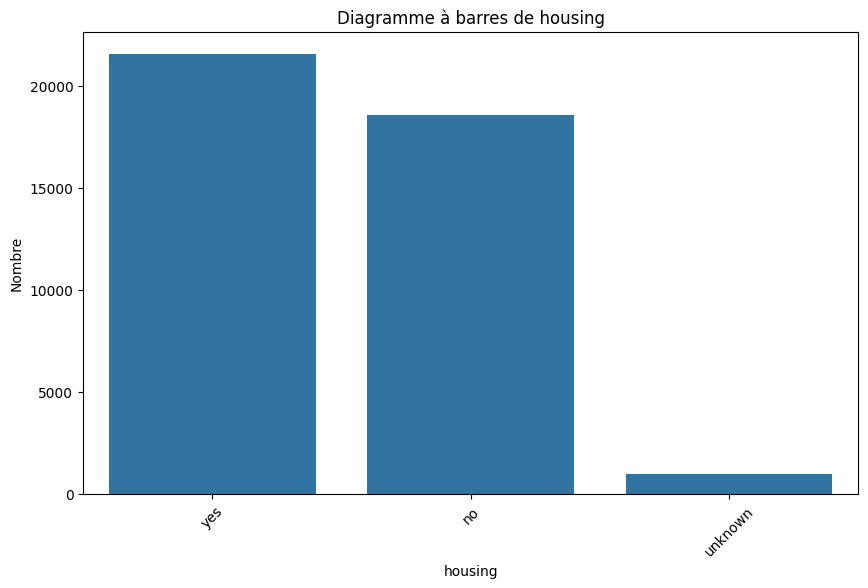

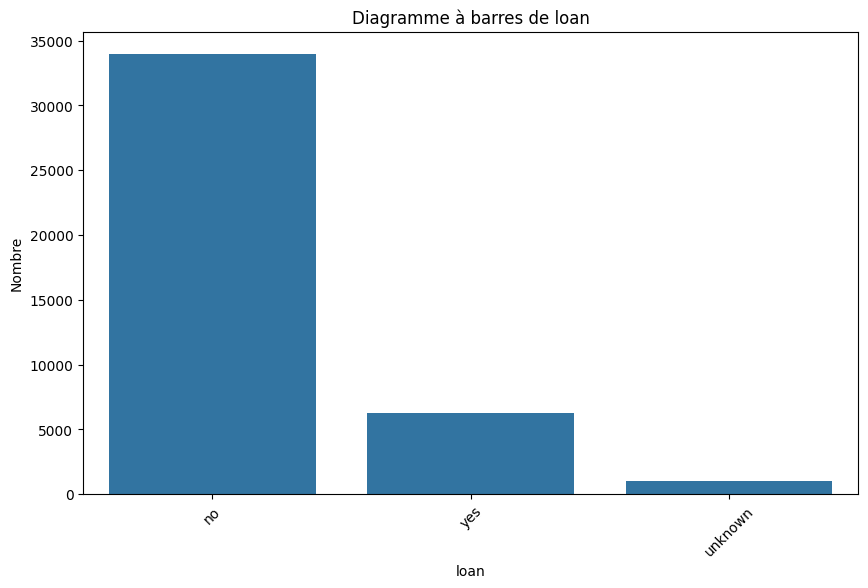

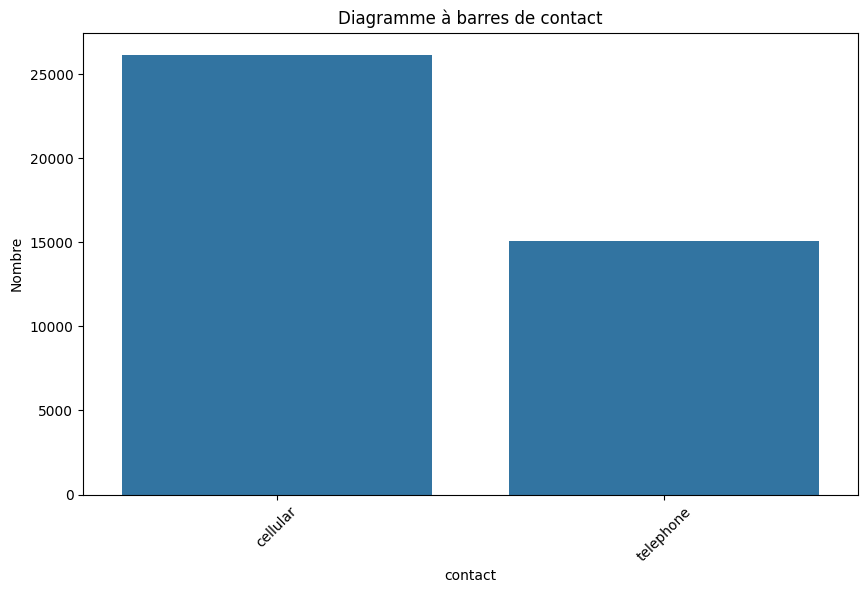

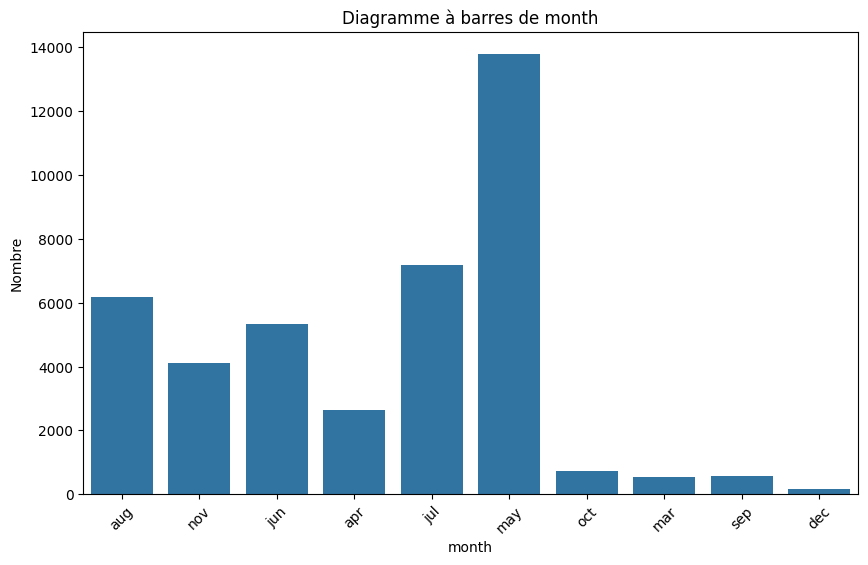

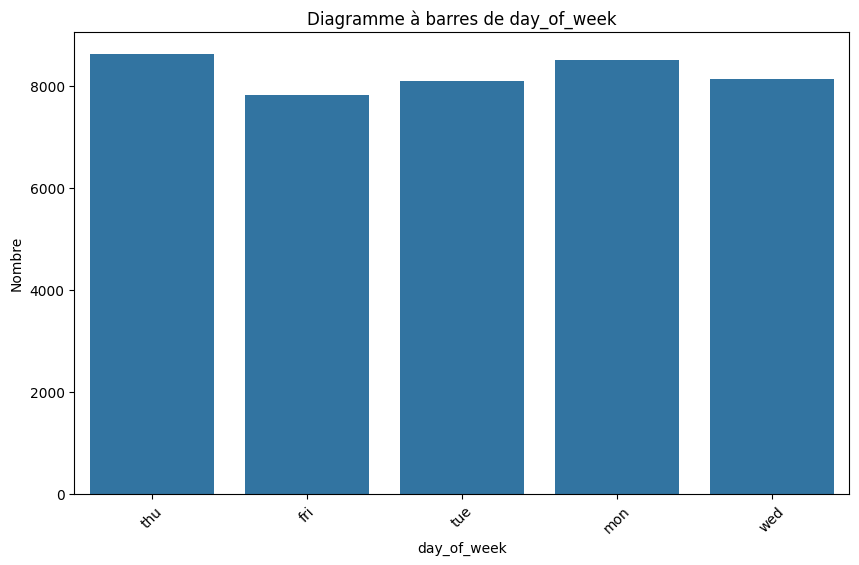

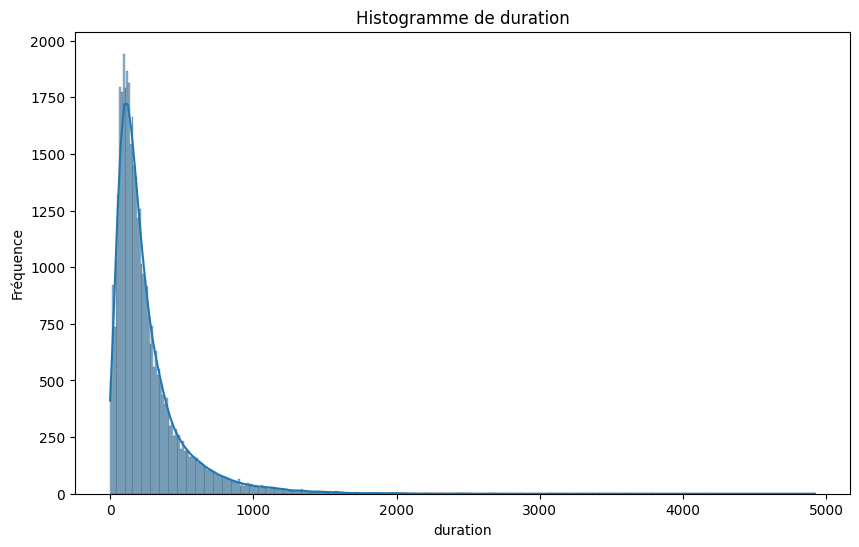

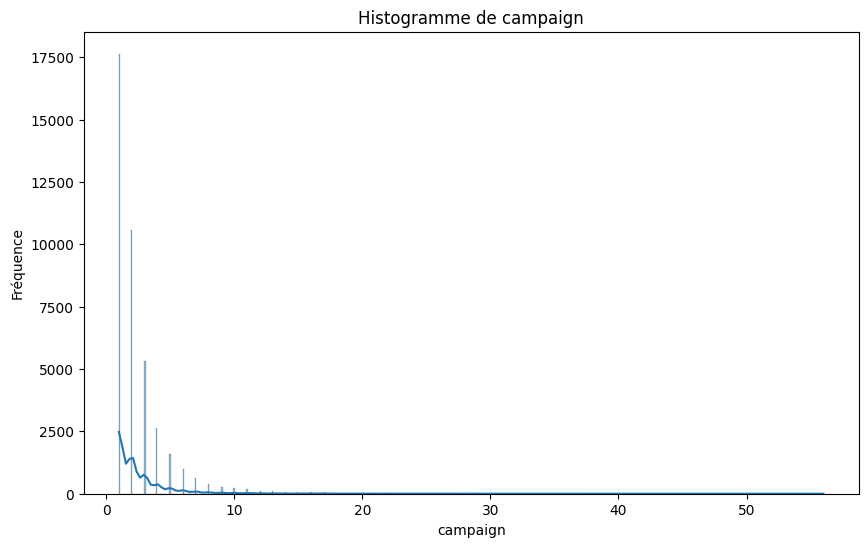

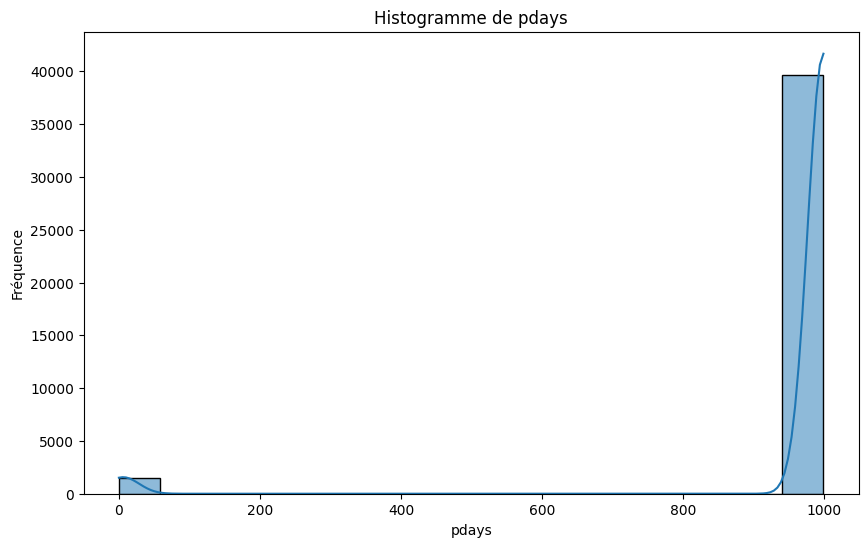

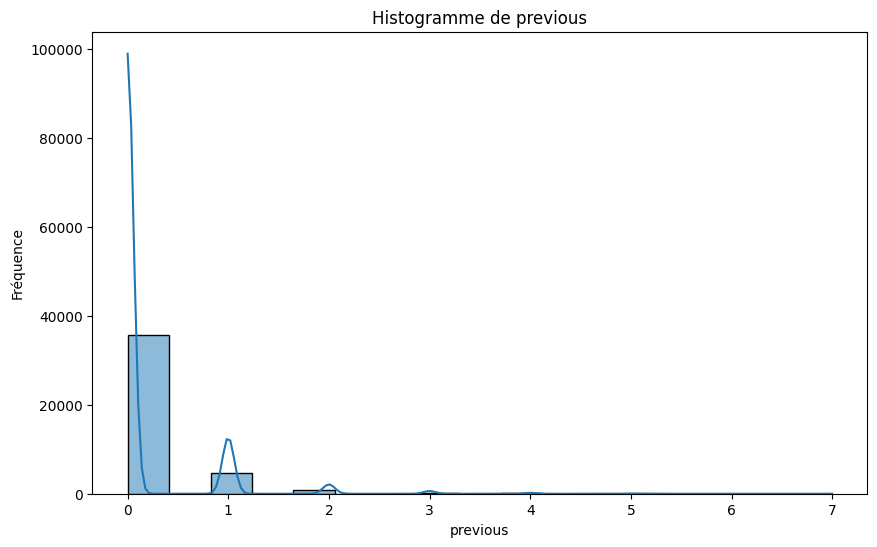

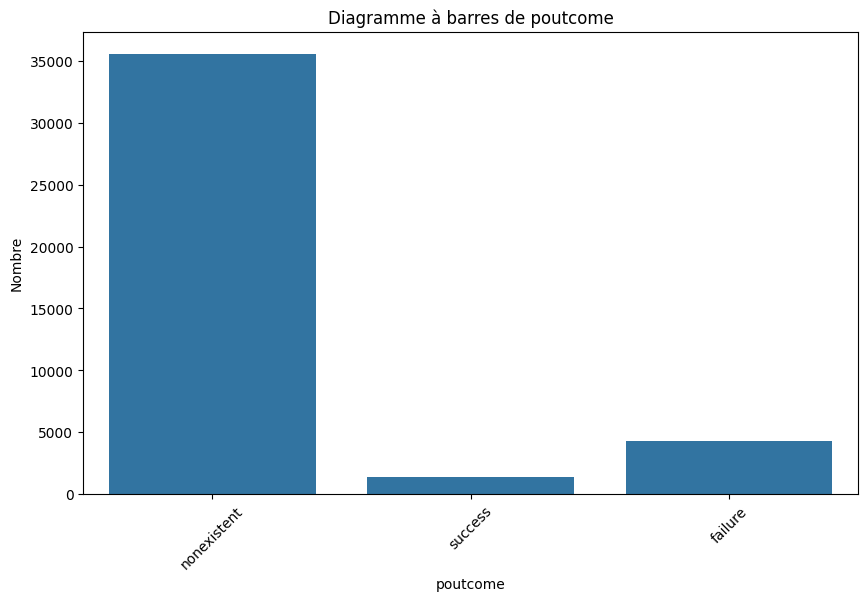

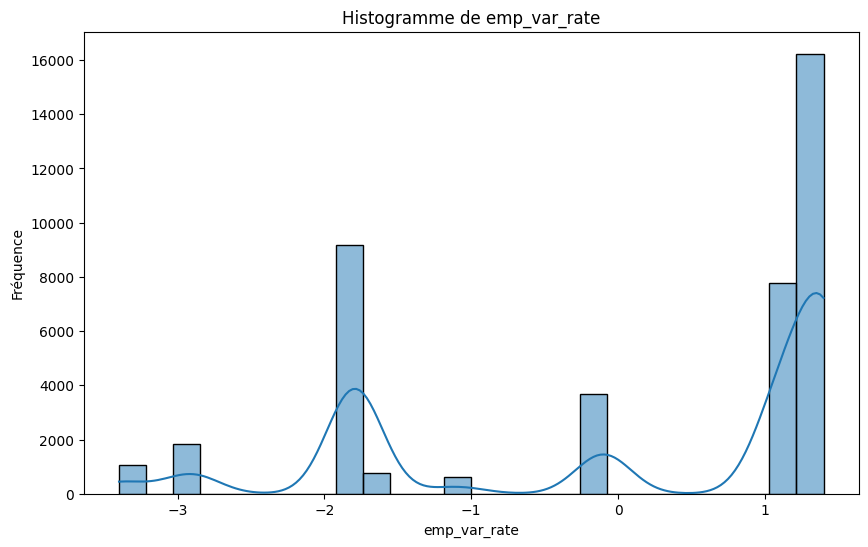

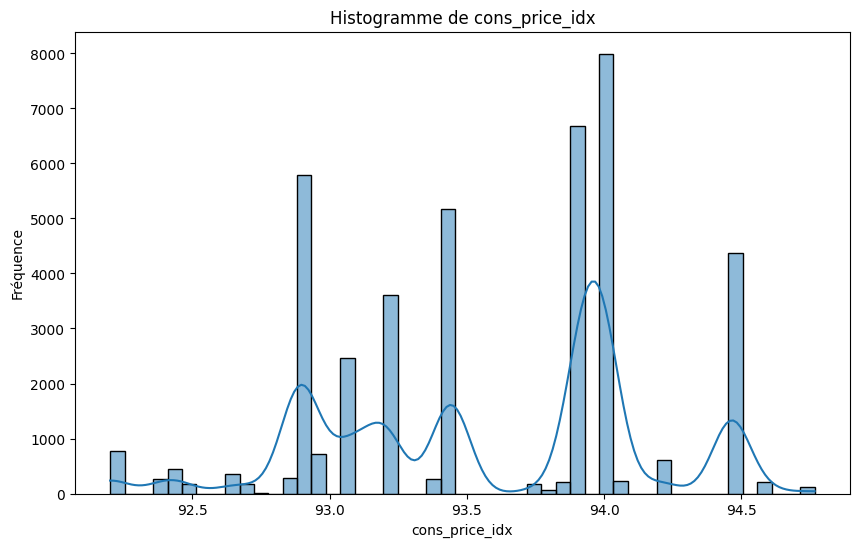

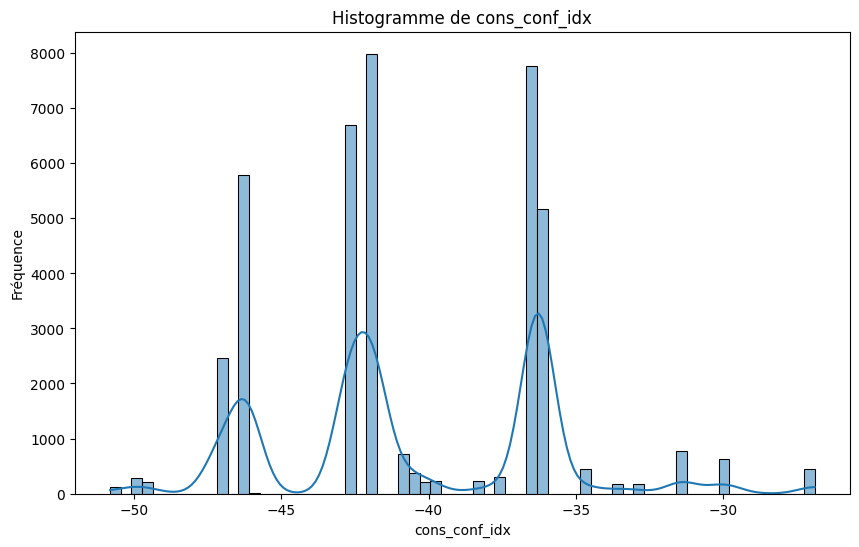

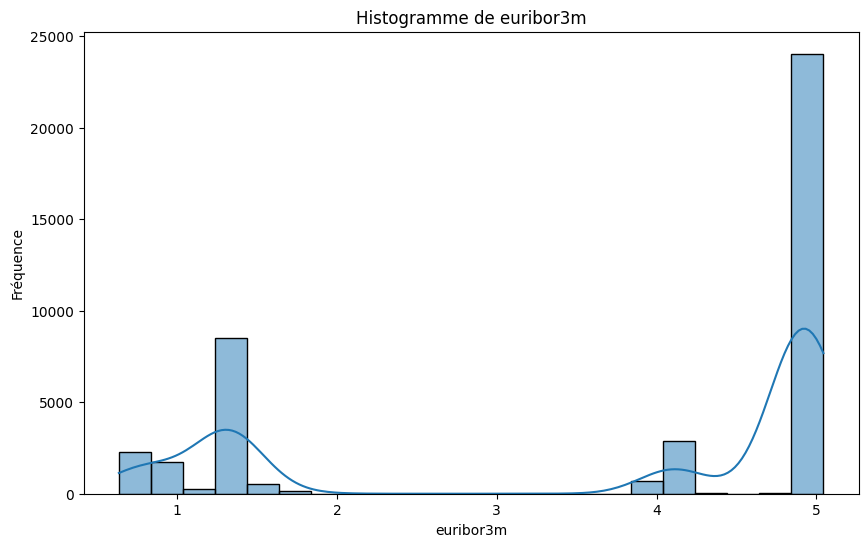

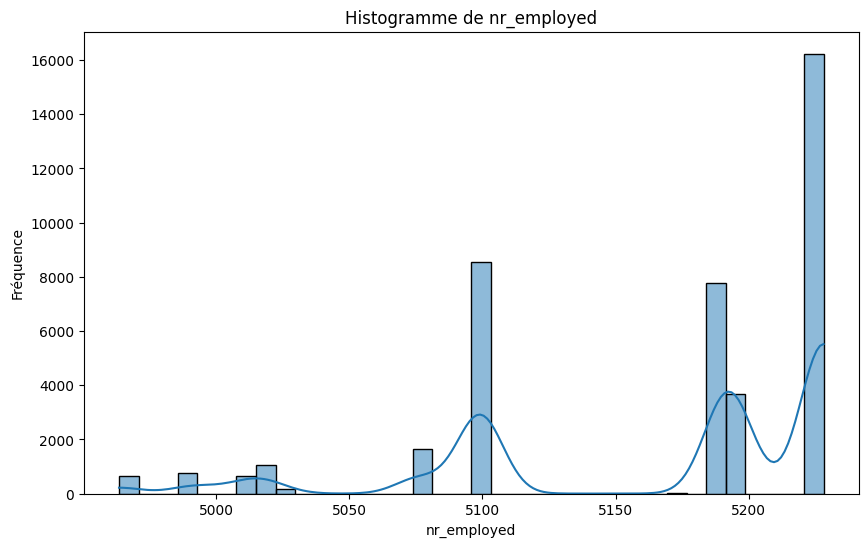

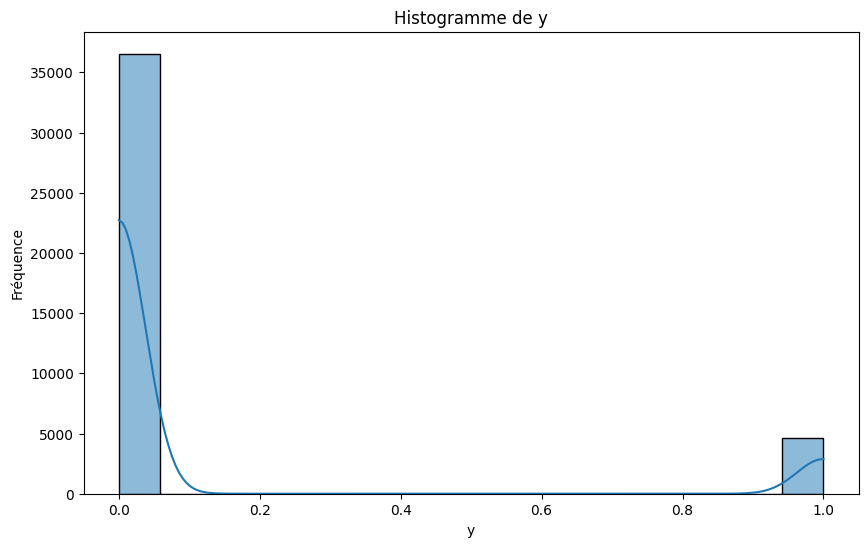

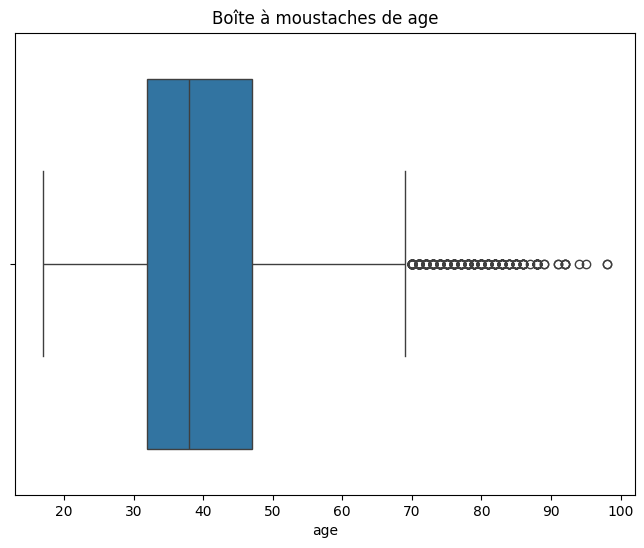

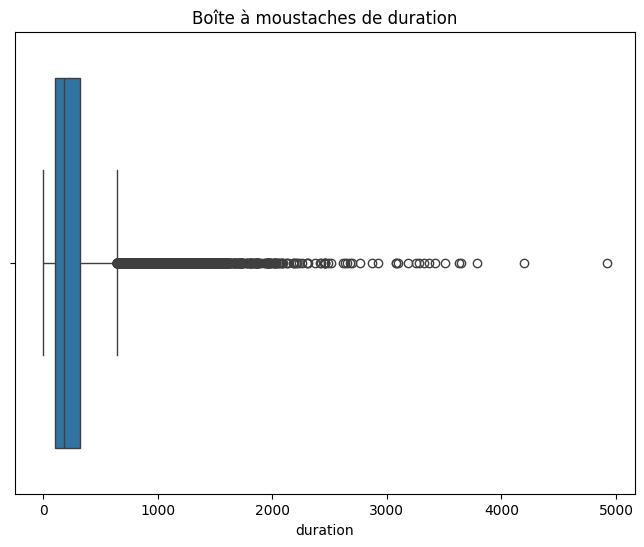

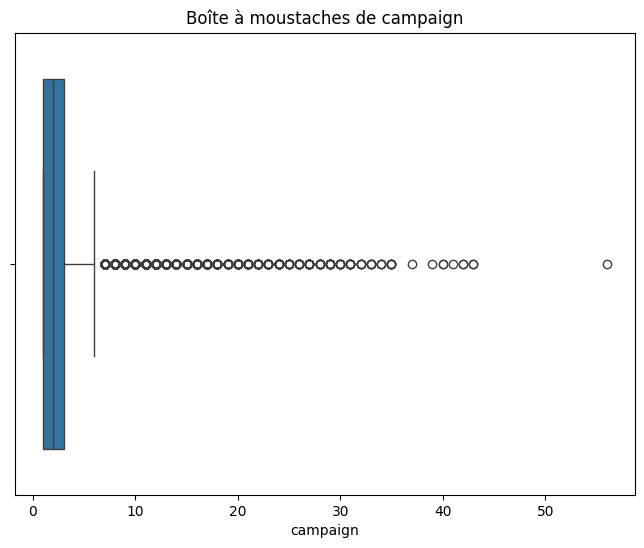

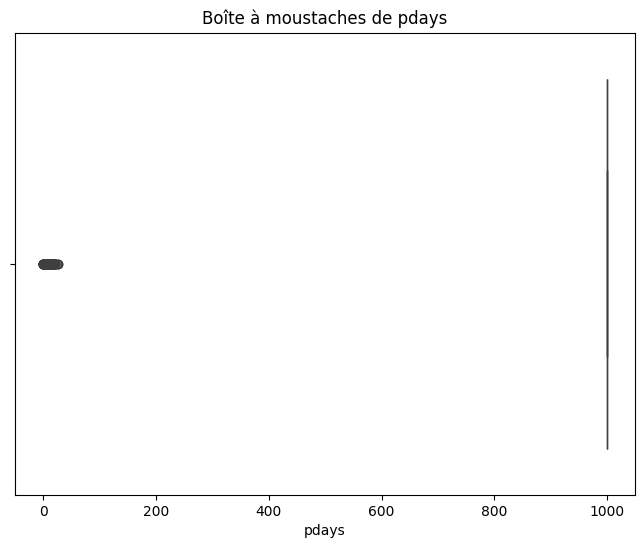

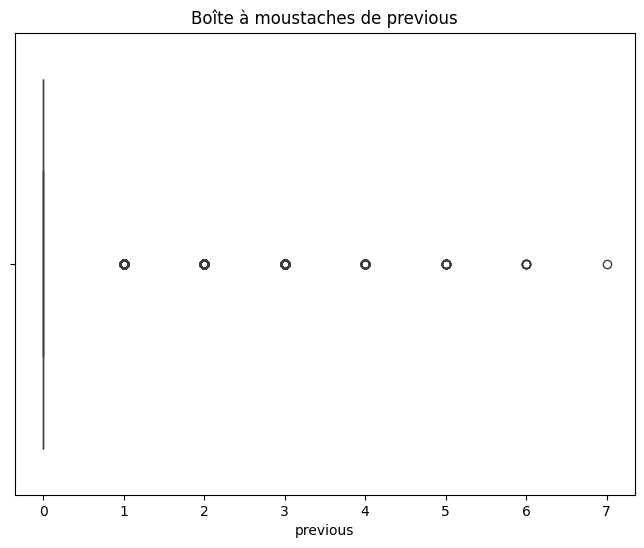

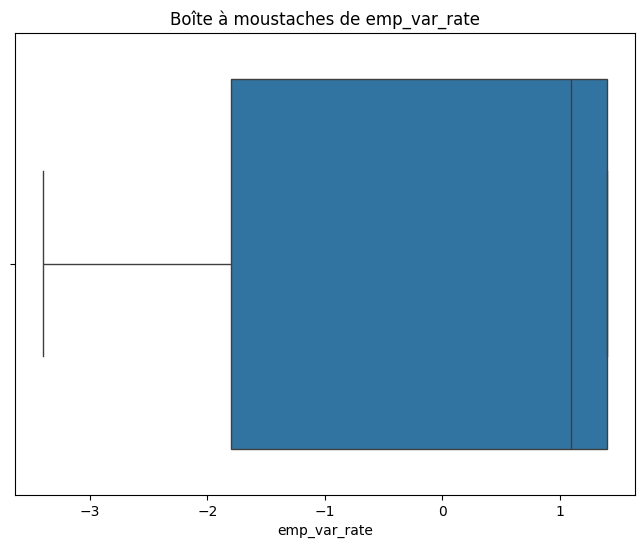

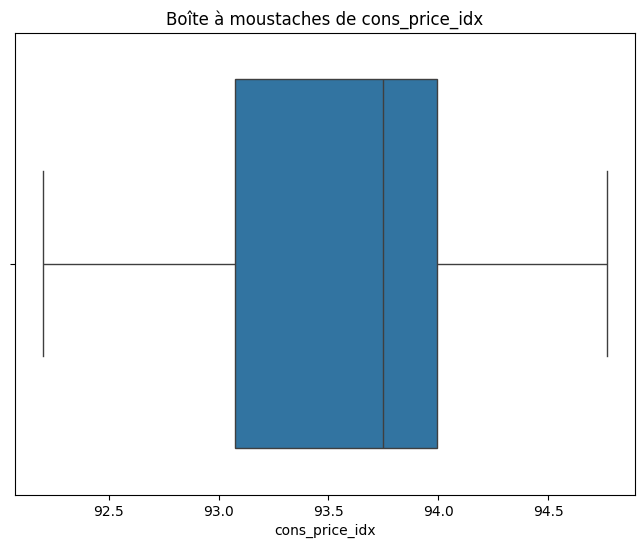

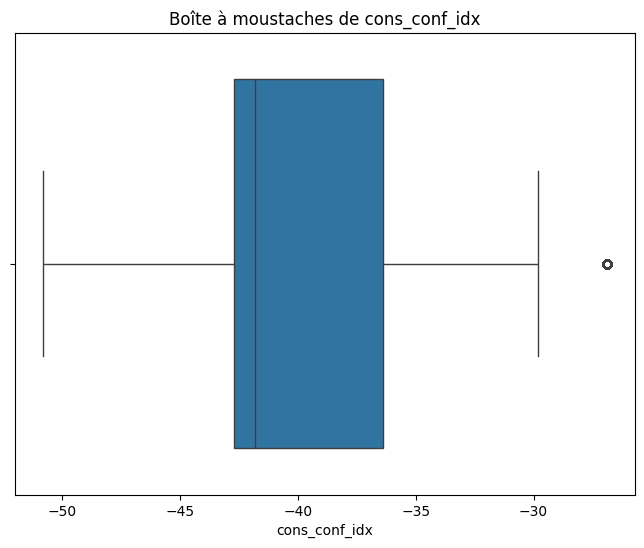

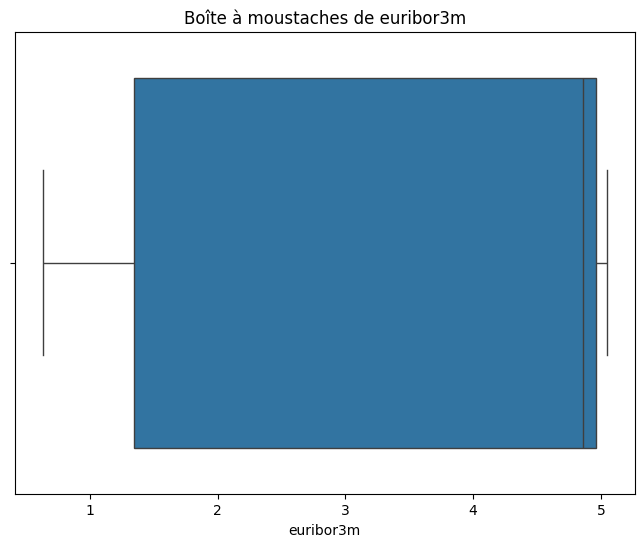

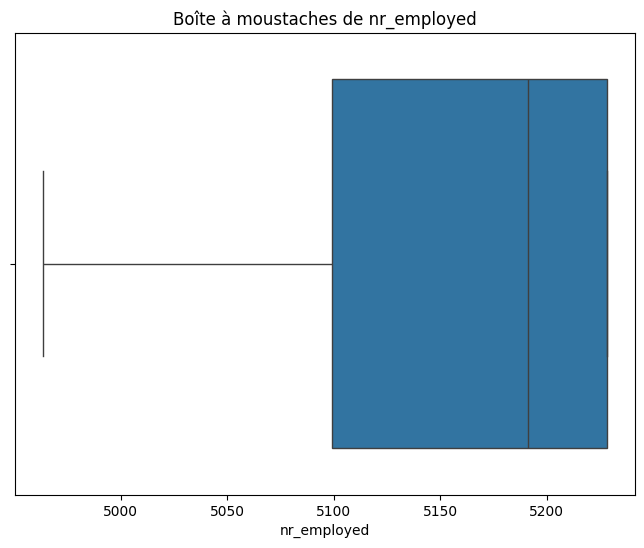

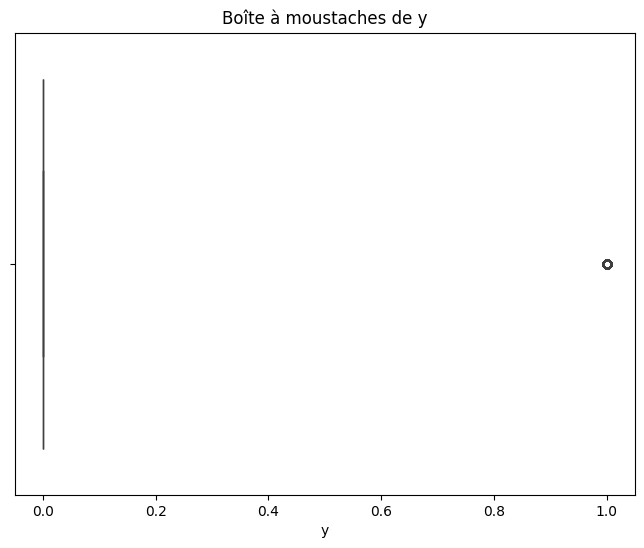

In [6]:
import seaborn as sns


# Définir toutes les colonnes
colonnes = df.columns

# Générer des histogrammes pour les variables numériques et des diagrammes à barres pour les variables catégoriques
for col in colonnes:
    plt.figure(figsize=(10, 6))
    
    # Histogramme pour les variables numériques
    if df[col].dtype != 'object':  # Vérifier si la colonne est numérique
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
    
    # Diagramme à barres pour les variables catégoriques
    else:
        sns.countplot(x=col, data=df)
        plt.title(f'Diagramme à barres de {col}')
        plt.xlabel(col)
        plt.ylabel('Nombre')
        plt.xticks(rotation=45)
    
    plt.show()

# Générer des boîtes à moustaches pour toutes les variables numériques
for col in colonnes:
    if df[col].dtype != 'object':  # Vérifier si la colonne est numérique
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boîte à moustaches de {col}')
        plt.xlabel(col)
        plt.show()


# Calcul valeurs manquantes 

In [7]:
# Calculer le taux de valeurs manquantes pour chaque variable
missing_values = df.isnull().mean() * 100
print("Taux de valeurs manquantes pour chaque variable :")
print(missing_values)

Taux de valeurs manquantes pour chaque variable :
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64


# Calcul valeurs aberrantes

In [8]:
# Identifier les valeurs aberrantes dans les variables numériques
numeric_columns = df.select_dtypes(include=np.number).columns
variables_aberrantes = {}

for col in numeric_columns:
    # Calculer les limites des valeurs aberrantes (1,5*IQR)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identifier les valeurs aberrantes
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    if not outliers.empty:
        #print(f"Valeurs aberrantes dans la variable {col}:")
        #print(outliers)
        variables_aberrantes[col] = outliers.tolist()

# Imprimer le nom des variables contenant des valeurs aberrantes
if variables_aberrantes:
    print("Les variables suivantes contiennent des valeurs aberrantes :", list(variables_aberrantes.keys()))
else:
    print("Aucune variable ne contient de valeurs aberrantes.")

Les variables suivantes contiennent des valeurs aberrantes : ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons_conf_idx', 'y']


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
def detecter_aberrantes_num(df):
    aberrant_values = {}
    for col in df.columns:
        if df[col].dtype != 'object' and col != 'y':  # Vérifier si la colonne est numérique
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            total_values_count = df[col].count()
            aberrant_values[col] = outliers_count / total_values_count * 100
    return pd.Series(aberrant_values)  # Convertir le dictionnaire en objet Series
 
# Appeler la fonction pour obtenir le taux de valeurs aberrantes
aberrant_values = detecter_aberrantes_num(df)


In [10]:
def afficher_valeurs_aberrantes_num(df):
    # Appeler la fonction pour détecter les valeurs aberrantes dans les variables numériques
    aberrant_values = detecter_aberrantes_num(df)
    # Afficher les pourcentages de valeurs aberrantes pour chaque variable numérique
    print("Taux de valeurs aberrantes pour chaque variable numérique :")
    for col, pourcentage in aberrant_values.items():
        print(f"{col}: {pourcentage:.2f}%")

afficher_valeurs_aberrantes_num(df)

Taux de valeurs aberrantes pour chaque variable numérique :
age: 1.14%
duration: 7.19%
campaign: 5.84%
pdays: 3.68%
previous: 13.66%
emp_var_rate: 0.00%
cons_price_idx: 0.00%
cons_conf_idx: 1.09%
euribor3m: 0.00%
nr_employed: 0.00%


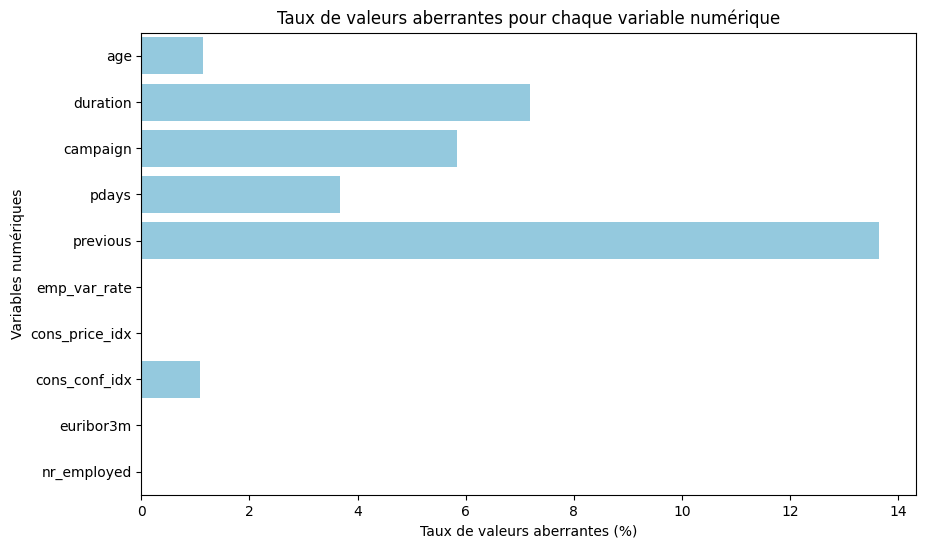

In [11]:
# Créer un diagramme à barres pour visualiser le taux de valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.barplot(x=aberrant_values.values, y=aberrant_values.index, color='skyblue')
plt.title("Taux de valeurs aberrantes pour chaque variable numérique")
plt.xlabel("Taux de valeurs aberrantes (%)")
plt.ylabel("Variables numériques")
plt.show()

In [12]:
def detecter_aberrantes_cat(df):
    aberrant_values_cat = {}
    for col in df.columns:
        if df[col].dtype == 'object':  # Vérifier si la colonne est catégorique
            counts = df[col].value_counts(normalize=True)
            rare_categories = counts[counts < 0.01]  # Définir un seuil pour déterminer les catégories rares
            if not rare_categories.empty:
                aberrant_values_cat[col] = rare_categories * 100  # Convertir en pourcentage
    return aberrant_values_cat

Taux de valeurs aberrantes pour les variables catégoriques :
job:
unknown: 0.80%

marital:
unknown: 0.19%

education:
illiterate: 0.04%

default:
yes: 0.01%

month:
dec: 0.44%



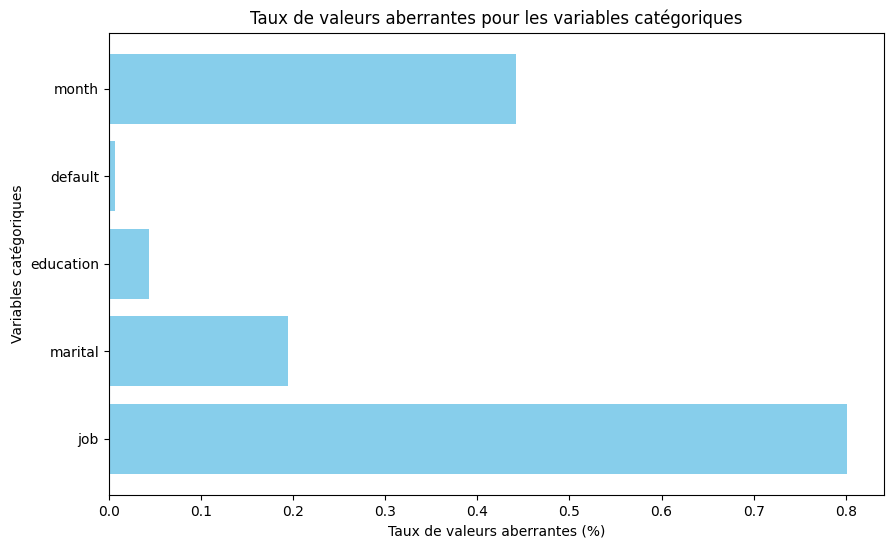

In [13]:
def afficher_valeurs_aberrantes_cat(df):
    # Appeler la fonction pour obtenir les valeurs aberrantes dans les variables catégoriques
    valeurs_aberrantes_cat = detecter_aberrantes_cat(df)
    print("Taux de valeurs aberrantes pour les variables catégoriques :")
    for col, valeurs in valeurs_aberrantes_cat.items():
        print(f"{col}:")
        for categorie, pourcentage in valeurs.items():
            print(f"{categorie}: {pourcentage:.2f}%")
        print()
    # Créer un diagramme à barres pour visualiser les valeurs aberrantes des variables catégoriques
    plt.figure(figsize=(10, 6))
    for col, valeurs in valeurs_aberrantes_cat.items():
        plt.barh(col, valeurs.values, color='skyblue')
    plt.title("Taux de valeurs aberrantes pour les variables catégoriques")
    plt.xlabel("Taux de valeurs aberrantes (%)")
    plt.ylabel("Variables catégoriques")
    plt.show()
 
# Appeler la fonction pour afficher les valeurs aberrantes pour les variables catégoriques
afficher_valeurs_aberrantes_cat(df)

# 3.Analyse multivariée : Examiner les corrélations entre les variables.

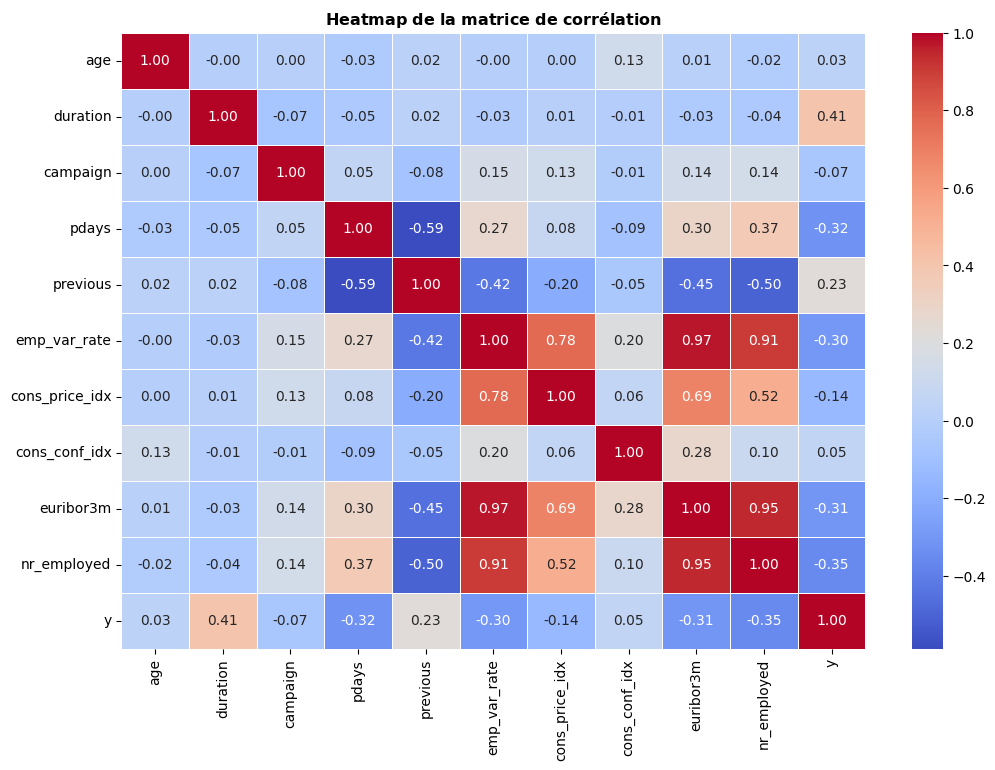

In [14]:
#Corrélation entre les variables
import seaborn as sns
import matplotlib.pyplot as plt

def afficher_heatmap_correlation(df):
    # Sélectionner uniquement les variables numériques
    df_numerique = df.select_dtypes(include=['float64', 'int64'])

    # Calculer la matrice de corrélation
    correlation_matrix = df_numerique.corr()

    # Créer une heatmap de la matrice de corrélation
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(r"$\bf{Heatmap\ de\ la\ matrice\ de\ corrélation}$", fontsize=11.5)
    plt.show()

# Appeler la fonction pour afficher le heatmap de la matrice de corrélation
afficher_heatmap_correlation(df)


# 4.Évaluation de la variable cible 'y' : Déterminer le nombre de classes dans la variable cible et évaluer l'équilibre de ces classes.

Nombre de classes dans la variable cible 'y' : 2
Équilibre des classes dans la variable cible 'y' :
y
0    36548
1     4640
Name: count, dtype: int64


C:\Users\Legion\AppData\Local\Temp\ipykernel_17616\1666187264.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(classes_count.index, rotation=0)


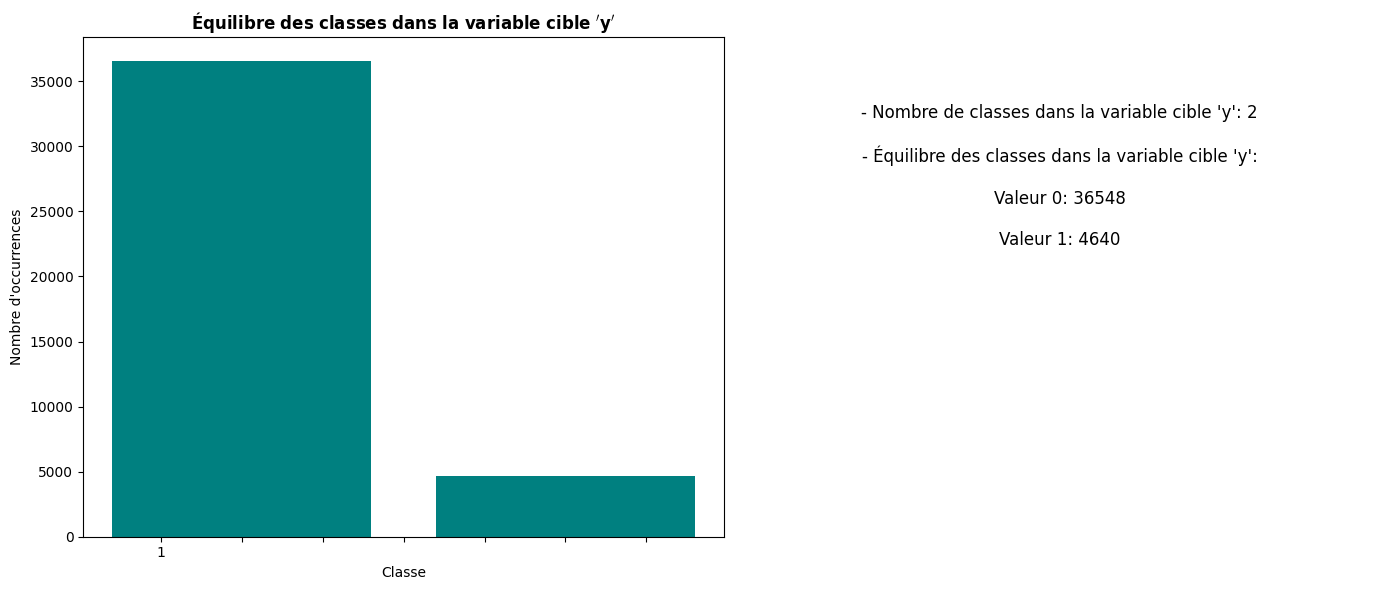

In [60]:
# Compter le nombre d'occurrences de chaque classe dans la variable cible 'y'
classes_count = df['y'].value_counts()

# Afficher le nombre de classes et l'équilibre de ces classes
print("Nombre de classes dans la variable cible 'y' :", len(classes_count))
print("Équilibre des classes dans la variable cible 'y' :")
print(classes_count)

 

 
# Créer une figure avec deux sous-graphiques

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
 
# Créer un diagramme à barres pour représenter l'équilibre des classes à gauche

ax1.bar(classes_count.index, classes_count.values, color='teal')  

ax1.set_title(r"$\bf{Équilibre\ des\ classes\ dans\ la\ variable\ cible\ 'y'}$", fontsize=12) 

ax1.set_xlabel("Classe")

ax1.set_ylabel("Nombre d'occurrences")

ax1.set_xticklabels(classes_count.index, rotation=0)
 
# Afficher les informations textuelles sur l'équilibre des classes à droite

info_text = f"- Nombre de classes dans la variable cible 'y': {len(classes_count)}\n\n- Équilibre des classes dans la variable cible 'y':\n\n"

for valeur, count in classes_count.items():

    info_text += f"Valeur {valeur}: {count}\n\n"

ax2.text(0.5, 0.5, info_text, 

         fontsize=12, ha='center')

ax2.axis('off')
 
plt.tight_layout()

plt.show()


C:\Users\Legion\AppData\Local\Temp\ipykernel_17616\658381941.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(classes_count.index, rotation=0)


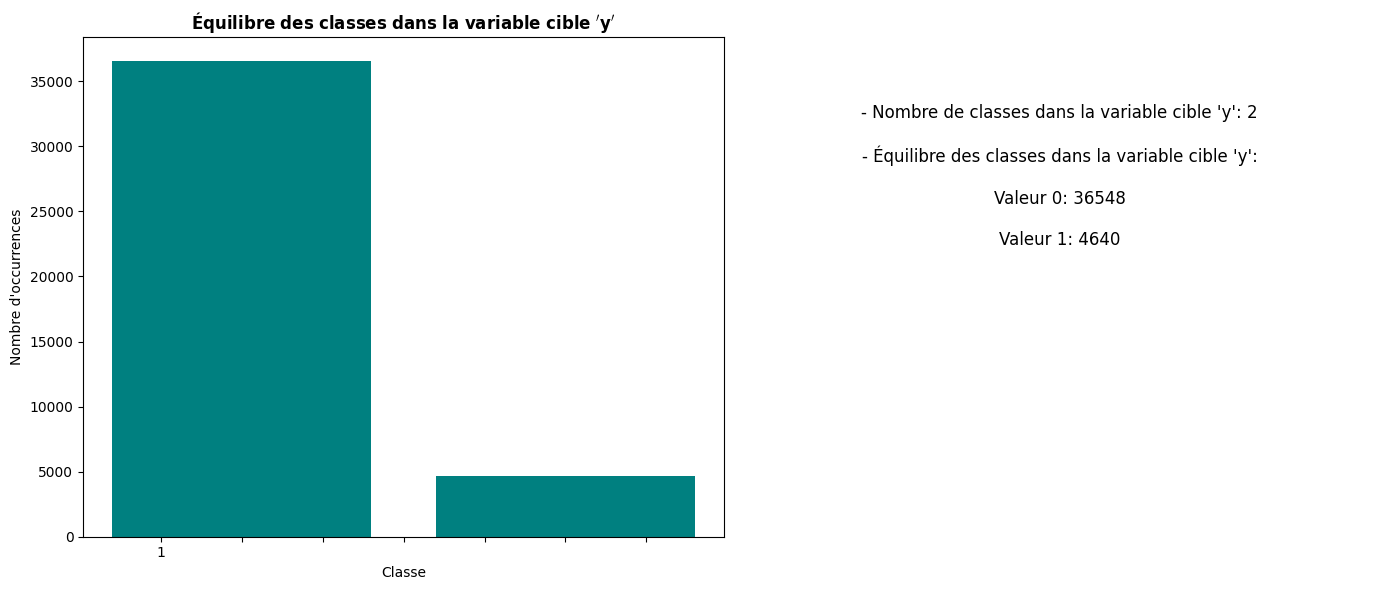

In [16]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences de chaque classe dans la variable cible 'y'
classes_count = df['y'].value_counts()

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Créer un diagramme à barres pour représenter l'équilibre des classes à gauche
ax1.bar(classes_count.index, classes_count.values, color='teal')  
ax1.set_title(r"$\bf{Équilibre\ des\ classes\ dans\ la\ variable\ cible\ 'y'}$", fontsize=12) 
ax1.set_xlabel("Classe")
ax1.set_ylabel("Nombre d'occurrences")
ax1.set_xticklabels(classes_count.index, rotation=0)

# Afficher les informations textuelles sur l'équilibre des classes à droite
info_text = f"- Nombre de classes dans la variable cible 'y': {len(classes_count)}\n\n- Équilibre des classes dans la variable cible 'y':\n\n"
for valeur, count in classes_count.items():
    info_text += f"Valeur {valeur}: {count}\n\n"
ax2.text(0.5, 0.5, info_text, 
         fontsize=12, ha='center')
ax2.axis('off')

plt.tight_layout()
plt.show()


# 5.Nettoyage des données : Traitement des valeurs manquantes et des valeurs aberrantes si nécessaire.

In [17]:
# creer une copie du dataframe original 
df_banking_copy = df.copy()

# Traitement des valeurs aberrantes num

In [18]:
from scipy.stats import zscore
 
# Définir une fonction pour supprimer les valeurs aberrantes pour les variables numériques
def remove_outliers_num(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            # Calculer les z-scores pour chaque valeur dans la colonne
            z_scores = zscore(df[col])
            # Déterminer les indices des valeurs aberrantes basées sur les z-scores
            outliers_index = (z_scores > 3) | (z_scores < -3)
            # Remplacer les valeurs aberrantes par NaN
            df.loc[outliers_index, col] = np.nan
    return df
 
# Appliquer la suppression des valeurs aberrantes pour les variables numériques à votre DataFrame
df_banking_copy = remove_outliers_num(df_banking_copy)

In [19]:
# Importer numpy
import numpy as np
 
# Imputer les valeurs manquantes uniquement pour les colonnes numériques avec la médiane
numeric_columns = df_banking_copy.select_dtypes(include=np.number).columns
df_banking_copy[numeric_columns] = df_banking_copy[numeric_columns].fillna(df_banking_copy[numeric_columns].median())
 
 
# Ajustement des limites de winsorization
def adjust_winsorization_limits(df):
    for col in df.columns:
        if df[col].dtype != 'object' and col != 'y':
            # Calculer les limites de winsorization adaptées
            lower_limit = df[col].quantile(0.05)
            upper_limit = df[col].quantile(0.95)
            # Appliquer la winsorization avec les nouvelles limites
            df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
            df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df
 
# Appliquer l'ajustement des limites de winsorization
df_banking_copy = adjust_winsorization_limits(df_banking_copy)

In [20]:
#verifier les taux des valeurs aberants apres traitement
afficher_valeurs_aberrantes_num(df_banking_copy)

Taux de valeurs aberrantes pour chaque variable numérique :
age: 0.00%
duration: 6.35%
campaign: 0.00%
pdays: 0.00%
previous: 11.07%
emp_var_rate: 0.00%
cons_price_idx: 0.00%
cons_conf_idx: 0.00%
euribor3m: 0.00%
nr_employed: 0.00%


# Traitement des valeurs aberrantes cat

In [61]:
# Remplacer les catégories rares par la modalité la plus fréquente pour les variables catégoriques
def replace_rare_categories(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            counts = df[col].value_counts(normalize=True)
            rare_categories = counts[counts < 0.01].index
            df[col] = df[col].replace(rare_categories, df[col].mode().iloc[0])
    return df
 
# Appliquer les fonctions pour traiter les valeurs aberrantes et les catégories rares
df = replace_rare_categories(df)

# 6.traitement de la variable catégorielle "education"

In [62]:
#'education' : Renommer toutes les catégories commençant par 'basic' en simplement 'basic'.
df_banking_copy['education'] = df_banking_copy['education'].str.replace('^basic.*$', 'basic', regex=True)
#'education' : Renommer toutes les catégories commençant par 'university' en simplement 'university'.
df_banking_copy['education'] = df_banking_copy['education'].str.replace('^university.*$', 'university', regex=True)
#'education' : Renommer toutes les catégories commençant par 'high' en simplement 'high'.
df_banking_copy['education'] = df_banking_copy['education'].str.replace('^high.*$', 'high', regex=True)
#'education' : Renommer toutes les catégories commençant par 'professional' en simplement 'professional'.
df_banking_copy['education'] = df_banking_copy['education'].str.replace('^professional.*$', 'professional', regex=True)

In [24]:
type_education = df_banking_copy["education"].unique()
print(type_education)

['basic' 'unknown' 'university' 'high' 'professional' 'illiterate']


# 7.Encodage des variables catégorielles.

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [26]:
# encodage one-hot avec des entiers sur la colonne 'month'
df_encode = pd.get_dummies(df_banking_copy, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week','month','poutcome'], dtype=int)

In [27]:
df_encode.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high',
       'education_illiterate', 'education_professional',
       'education_university', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_ma

# 8.Séparation des caractéristiques (features) dans X et de la variable cible dans Y.

In [28]:
X = df_encode.drop(columns=['y'])  # Exclure la colonne de la variable cible

# Séparation de la variable cible dans Y
Y = df_encode['y']

# 9.Division des données en ensembles d'entraînement et de test.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 10.Gestion du problème de données déséquilibrées.

In [30]:
from imblearn.over_sampling import SMOTE
# Appliquer la sur-échantillonnage SMOTE uniquement sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# 11.Création une experience dans mlflow.

In [31]:
import mlflow

if __name__ == "__main__":
    # create a new mlflow experiment
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    experiment_id = mlflow.create_experiment(
        name="Projet_Mlops",
        artifact_location="Projet_Mlops_mlflow_artifacts",
        tags={"env": "dev", "version": "1.0.0"},
    )

    print(experiment_id)

459938943634618831


# 12.Recherche du meilleur modèle en évaluant au moins trois modèles sans effectuer de réglages. Identifier le modèle optimal en termes de performances enregistrées à l'aide de mlflow et visualiser la matrice de confusion associée.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
models = {
    "Random Forest": RandomForestClassifier(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

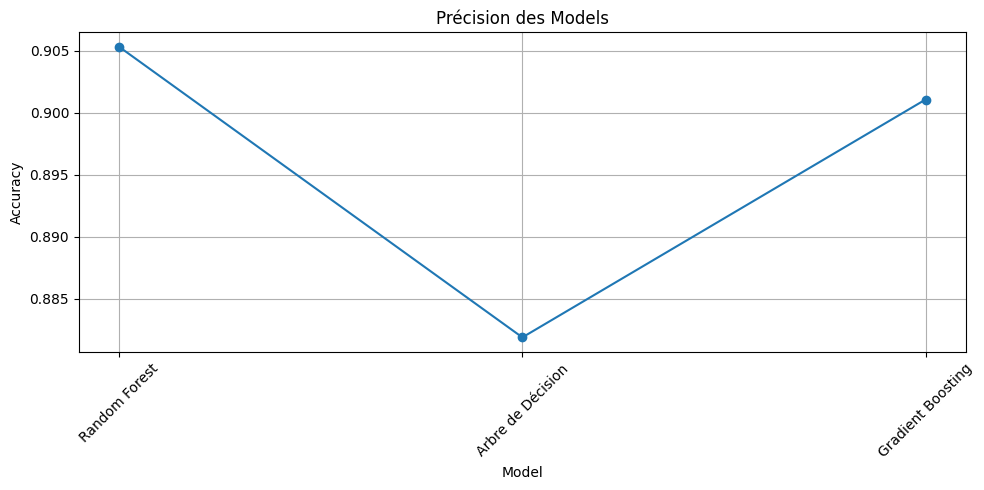

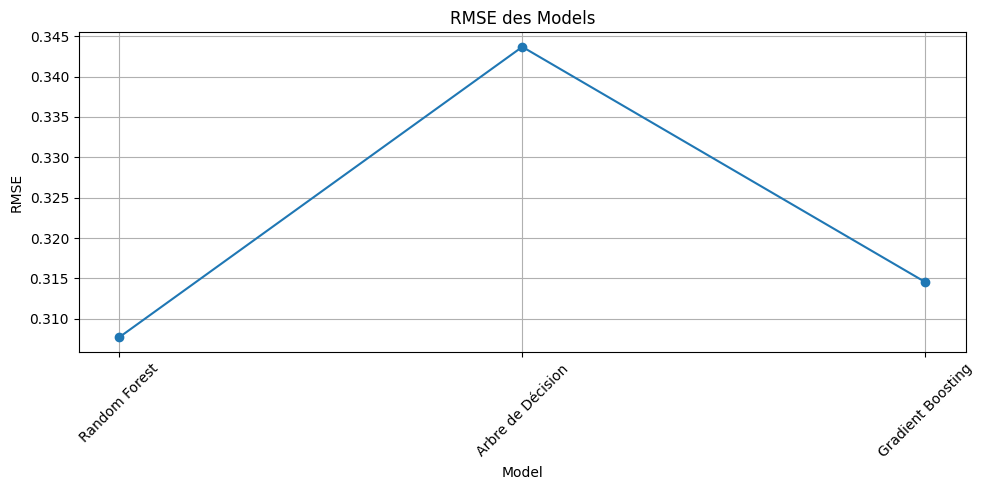

In [55]:
from sklearn.metrics import confusion_matrix

# Listes pour stocker les valeurs d'accuracy et de RMSE pour chaque modèle
accuracy_values = []
rmse_values = []
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name,experiment_id=experiment_id):
        # Entraîner le modèle
        model.fit(X_train_resampled, y_train_resampled)
        
        # Prédire sur l'ensemble de test
        Y_pred = model.predict(X_test)
        
        # Calculer la matrice de confusion
        cm = confusion_matrix(Y_test, Y_pred)
        
        # Calculer l'exactitude
        accuracy = accuracy_score(Y_test, Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
        # Ajouter les valeurs d'accuracy et de RMSE aux listes
        accuracy_values.append(accuracy)
        rmse_values.append(rmse)

        # Enregistrer l'exactitude dans MLflow
        mlflow.log_metric("Accuracy", accuracy)
        # Log RMSE as a metric in MLflow
        mlflow.log_metric("RMSE", rmse)
        # Convertir la matrice de confusion en DataFrame pandas
        cm_df = pd.DataFrame(cm, index=["Classe réelle 0", "Classe réelle 1"], columns=["Prédiction 0", "Prédiction 1"])

        # Enregistrer le DataFrame dans un fichier CSV
        cm_file = "confusion_matrix_" + model_name + ".csv"
        cm_df.to_csv(cm_file)

        # Enregistrer la matrice de confusion dans MLflow en tant qu'artefact
        mlflow.log_artifact(cm_file, "confusion_matrices")
# Tracer le graphique d'accuracy
plt.figure(figsize=(10, 5))
plt.plot(models.keys(), accuracy_values, marker='o', linestyle='-')
plt.title('Précision des Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Tracer le graphique de RMSE
plt.figure(figsize=(10, 5))
plt.plot(models.keys(), rmse_values, marker='o', linestyle='-')
plt.title('RMSE des Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 13.Optimisation des hyperparamètres pour améliorer les performances des modèles. Enregistrer le nouveau modèle amélioré avec les paramètres optimaux dans mlflow.

RandomForestClassifier(n_estimators=200)
DecisionTreeClassifier(min_samples_split=5)
GradientBoostingClassifier(n_estimators=200)


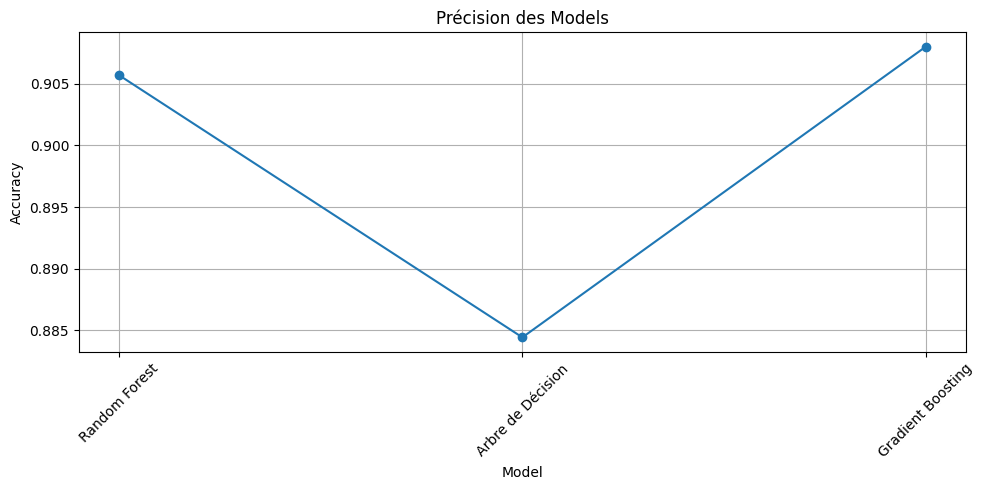

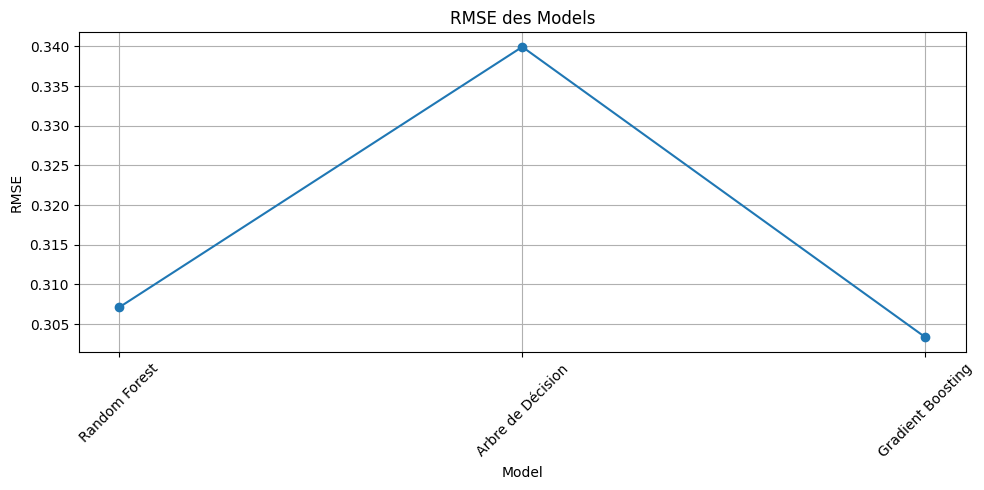

fin GradientBoostingClassifier(n_estimators=200)...


In [56]:
from sklearn.model_selection import GridSearchCV
from mlflow import MlflowClient
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

 
param_distributions = {
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None]},
    "Arbre de Décision": {'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}
best_accuracy = 0
best_rmse = float('inf')
best_model = None
best_params = {}
# Listes pour stocker les valeurs d'accuracy et de RMSE pour chaque modèle
accuracy_values = []
rmse_values = []
# Entraînement et évaluation des modèles
for name, model in models.items():
    param_dist = param_distributions[name]
    random_search = RandomizedSearchCV(model, param_dist, n_iter=2, cv=2, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train_resampled, y_train_resampled)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    accuracy_values.append(accuracy)
    rmse_values.append(rmse)
    if accuracy > best_accuracy and rmse < best_rmse:
        best_accuracy = accuracy
        best_rmse = rmse
        best_model_name = name
        best_params = random_search.best_params_
    print(best_model)
# Tracer le graphique d'accuracy
plt.figure(figsize=(10, 5))
plt.plot(models.keys(), accuracy_values, marker='o', linestyle='-')
plt.title('Précision des Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Tracer le graphique de RMSE
plt.figure(figsize=(10, 5))
plt.plot(models.keys(), rmse_values, marker='o', linestyle='-')
plt.title('RMSE des Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"fin {best_model}...")

In [57]:
from mlflow.models import infer_signature
# Enregistrement du meilleur modèle dans MLflow
with mlflow.start_run(run_name=f"Best_Model_{best_model_name}", experiment_id=experiment_id) as run:
        
        mlflow.log_params(best_params)
        mlflow.log_metric(f"Best_Model_{best_model_name}", best_accuracy)
        signature = infer_signature(X_train,best_model.predict(X_test))
        mlflow.sklearn.log_model(sk_model=best_model,
                                  artifact_path=f"Best_Model_{best_model_name}",
                                    registered_model_name=f"Best_Model_{best_model_name}",
                                    signature=signature,
                                    input_example=X_train_resampled)
        
        

c:\Users\Legion\Desktop\cours master\Projet_Deploiement_model\venv\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Best_Model_Gradient Boosting' already exists. Creating a new version of this model...
2024/04/26 11:55:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for 

# 14.Déploiement du modèle en production en utilisant mlflow

In [63]:
# # create model version 
#from mlflow import MlflowClient
#source = "file:///C:/Users/Legion/Projet_Mlops1_mlflow_artifacts/54790f0f6fd74e77a11bfd2f0f069aaf/artifacts/custom_model"
#run_id = "54790f0f6fd74e77a11bfd2f0f069aaf"
#client.create_model_version(name=model_name, source=source, run_id=run_id)
#client.transition_model_version_stage(name=best_model_name, version=3, stage="Staging")